<a id=top></a>
# **CMSC 320 Final Project - Visualization and Analysis of Liquor Sales in Iowa**
## **Author: Richard Liang**

## **Table of Contents**
0. [Introduction](#0) <br>
1. [Part 1: Gathering Data](#1) <br>
  1.1 [Loading in data Part I](#1.1)<br>
  1.2 [Loading in data Part II](#1.2)<br>
  1.3 [Tidying Data](#1.3)<br>
2. [Exploratory Data Analysis](#2)<br>
  2.1 [Displaying Liquor Sales Heatmap](#2.1)<br>
  2.2 [Plotting Liquor Sales by County](#2.1)<br>
  2.3 [Plotting Liquor Sales Against Time](#2.1)<br>
3. [Hypothesis Testing](#3)<br>
  3.1 [Two-Sample Hypothesis Testing](#3.1)<br>
  3.2 [Hypothesis Testing Conclusions](#3.2)<br>
4. [Machine Learning - Multiple Linear Regression](#4)<br>
  4.1 [Data Preprocessing](#4.1)<br>
  4.2 [Multiple Linear Regression Function](#4.2)<br>
  4.3 [Multiple Linear Regression Results](#4.3)<br>
  4.4 [Multiple Linear Regression Conclusion](#4.4)<br>
5. [Conclusion](#5)


<a id=0></a>
## **Introduction**

In today’s day and age, stores like Amazon, Target, Costco, and Walmart are investing heavily into virtualizing its customers’ shopping experiences. Almost anything from a new smartphone to tomorrow’s dinner can be purchased online now. In fact, an increasing number of people are buying groceries online. This leaves small mom and pop shops and convenience stores with physical locations struggling to retain customers and pay the bills. In this project, we will explore a small part of how these physical stores, or even new aspiring store owners, can strategize operations to maximize profits--starting with liquor sales in the midwestern state of Iowa. 

The question I hope to answer in this project is: what factors influence Iowans to spend more money on liquor at a store? These factors could include a store’s location, the time of the year, or simply the store’s catalog.



![title](https://i.imgur.com/YgbYi2O.jpg)

<a id=1></a>
## **Part 1: Gathering Data**

<a id=1.1></a>
### **1.1 Loading in Data Part I**

The dataset that I use is "Iowa Liquor Sales - 12 million alcoholic beverage sales in the Midwest", a CSV which can be found [here](https://www.kaggle.com/residentmario/iowa-liquor-sales) on Kaggle.

Because this dataset contains over 12 million rows of data, which is around 3.4GB, I decided that it would be a good idea to take a random sample of 0.5% of the original CSV to analyze. By doing this, I can whittle down the original dataset to 62,955 rows, or around 17 MB of data, which allows my code to perform a lot faster.

To sample from the original dataset to create a smaller one, I wrote a small Python script, using the Pandas library. The script is detailed below:

```
import pandas as pd

# read in the humongous CSV into a Pandas dataframe
full_data = pd.read_csv('Iowa_Liquor_Sales.csv')

# a random 0.5% sample of full_data without replacement
sampled_data = full_data.sample(frac=0.005)

# export sampled_data into another CSV
sampled_data.to_csv('iowa_liquor_sales_sample.csv', index=False)
```

After creating `iowa_liquor_sales_sample.csv`, I then uploaded the file to GitHub so it could be accessible online [here](https://raw.githubusercontent.com/RYLiang18/Richard-CMSC-320-Final-Project-F2020/main/iowa_liquor_sales_sample.csv) instead of locally







<a id=1.2></a>
### **1.2 Loading in Data Part II**

**Imports**

Here, we will be using the [`pandas`](https://pandas.pydata.org/docs/#) data analysis library so that we can read in our CSV dataset and save it as a **dataframe**, allowing us to perform various forms of data parsing and analysis.

Additionally, we will also be using the [`numpy`](https://numpy.org/doc/1.19/) library. The main purpose of numpy here in this section will be to help us identify which rows in our pandas dataframe have missing attributes, or column values. These will be marked with `np.nan`.

Both of these libraries, including all (or at least most) of the libraries used in this tutorial can be installed using the [Anaconda](https://docs.anaconda.com/) package manager.

In [1]:
import pandas as pd
import numpy as np

<a id=1.2.1></a>
#### **1.2.1 Reading in data from CSV to Pandas Dataframe**

As mentioned earlier, the dataset I use in this tutorial is `iowa_liquor_sales_sample.csv`, which I saved on GitHub. 

In [2]:
# save unmodified csv into all_data
all_data = pd.read_csv('https://raw.githubusercontent.com/RYLiang18/Richard-CMSC-320-Final-Project-F2020/main/iowa_liquor_sales_sample.csv')

# create another dataframe called data 
data = pd.read_csv('https://raw.githubusercontent.com/RYLiang18/Richard-CMSC-320-Final-Project-F2020/main/iowa_liquor_sales_sample.csv')

Here, we can see what the raw dataframe looks like, and we can already notice some inconsistencies. For example, on rows 2 and 3, the city attribute is **"DES MOINES"** in all caps; however, on row 62954, the city attribute is **"Des Moines**", written normally. While these are clearly the same cities in our heads, to make our code work, we need to tidy it up, which is done in section 1.3


In [3]:
all_data

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-01582800052,11/14/2016,2629,Hy-Vee Food Store #2 / Council Bluffs,1745 Madison Ave,Council Bluffs,51503,1745 Madison Ave\nCouncil Bluffs 51503\n(41.24...,78.0,POTTAWATTA,1011200.0,Straight Bourbon Whiskies,421.0,SAZERAC COMPANY INC,16518,Ancient Age Bourbon,6,1750,$11.80,$17.70,1,$106.20,1.75,0.46
1,INV-04183000098,04/05/2017,4509,A J'S LIQUOR II,2515 Chamberlain,Ames,50010,"2515 Chamberlain\nAmes 50010\n(42.021461, -93....",85.0,STORY,1062300.0,Aged Dark Rum,259.0,Heaven Hill Brands,43991,Admiral Nelson Black Patch,12,750,$6.96,$10.44,1,$125.28,0.75,0.19
2,S04167100031,02/20/2012,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,3424 MARTIN LUTHER KING JR PKW\nDES MOINES 503...,77.0,Polk,1031080.0,VODKA 80 PROOF,55.0,Sazerac North America,35316,Barton Vodka,12,750,$3.37,$5.05,12,$60.60,9.00,2.38
3,S11597500006,04/11/2013,4617,Lickety Liquor,2501 HUBBELL AVE,DES MOINES,50317,2501 HUBBELL AVE\nDES MOINES 50317\n(41.607817...,77.0,Polk,1031080.0,VODKA 80 PROOF,300.0,Mccormick Distilling Company,36903,Mccormick Vodka,48,200,$1.13,$1.70,48,$81.60,9.60,2.54
4,INV-02904200001,01/25/2017,5264,Casey's General Store # 2177/Mitchel,"309, Center Ave",Mitchellville,50169.0,"309, Center Ave\nMitchellville 50169\n(41.6634...",77.0,POLK,1012100.0,Canadian Whiskies,115.0,CONSTELLATION BRANDS INC,11776,Black Velvet,12,750,$5.23,$7.85,1,$94.20,0.75,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,INV-02566000014,01/05/2017,3899,Wal-Mart 3762 / WDM,6365 Stagecoach Dr,West Des Moines,50266.0,6365 Stagecoach Dr\nWest Des Moines 50266\n(41...,77.0,POLK,1031000.0,American Vodka,205.0,E & J Gallo Winery,36971,New Amsterdam Vodka,6,1750,$14.00,$21.00,1,$119.88,1.75,0.46
62951,S11087500015,03/13/2013,4202,Fareway Stores #829 / Sioux City,4267 SERGEANT RD,SIOUX CITY,51106,4267 SERGEANT RD\nSIOUX CITY 51106\n(42.451213...,97.0,Woodbury,1012300.0,IRISH WHISKIES,370.0,Pernod Ricard USA/Austin Nichols,15626,Jameson,12,750,$13.90,$20.85,3,$62.55,2.25,0.59
62952,S22496800024,11/20/2014,4214,New Star Liquor / Lafayet / Waterloo,1309 LAFAYETTE ST,WATERLOO,50703,"1309 LAFAYETTE ST\nWATERLOO 50703\n(42.494092,...",7.0,Black Hawk,1031200.0,VODKA FLAVORED,260.0,Diageo Americas,77740,Smirnoff Raspberry,12,750,$8.25,$12.38,3,$37.14,2.25,0.59
62953,INV-00081700023,09/01/2016,4057,Tequila's Liquor Store,1434 Des Moines St Ste 5,Des Moines,50316.0,1434 Des Moines St Ste 5\nDes Moines 50316\n(4...,77.0,POLK,1070000.0,Cocktails / RTD,395.0,PROXIMO,58888,Jose Cuervo Authentic Lime Margarita 4pk Cans,6,800,$3.88,$5.82,1,$34.92,0.80,0.21


<a id=1.3></a>
### **1.3 Tidying Data**

The next step is to tidy up our data and make sure that all columns in our dataframe that we plan on using are in the right format.

For this, we will:

1. Drop unused columns (attributes)
2. Remove/Minimizing inconsistencies in the remaining columns 
3. Ensure that the values in columns are in the right format.
4. Removing outliers



<a id=1.3.1></a>
#### **1.3.1 Dropping unused columns**

Because we will primarily be analyzing the sales of different types of liquor and the locations of liquor stores, some of the attributes that we can defintiely drop are `Invoice/Item Number`, `Store Name`, `Store Number`, `Address`, `Volume Sold (Gallons)`, and `State Bottle Cost`. We may end up using some of the other attributes, so we won't delete them.

In the introduction, I mentioned that store location could be valuable. You may be wondering now that if we care about the location of these liquor sales, why are we deleting the address? This is because the addresses are already stored in the `Store Location` attribute. Later on, when we plot a **heatmap** of all of our liquor sales, we will care mostly about the longitude and latitude of the stores that sales occurred at. These coordinates are also included in the `Store Location` attribute.

In [4]:
# Let's drop unused columns
data = data.drop(
  [
    'Invoice/Item Number', 
    'Store Name',
    'Store Number', 
    'Address', 
    'Volume Sold (Gallons)',
    'State Bottle Cost'
  ],
  axis = 1
)

<a id=1.3.2></a>
#### **1.3.2 Removing/Minimizing Inconsistencies**

To minimize inconsistencies, we will have to make sure that observations with the same specific attribute are labeled as such.

**Removing Inconsistencies in `dtype: numpy.object` Columns by Converting to Lowercase**

One of the first things that we will do to remove inconsistencies is to convert all attributes that are `dtype: numpy.str` to lowercase. Case sensitivity is now no longer a reason for inconsistent attributes.

In [5]:
for col_name in data.columns:
  if (data[col_name].dtype == np.object):
    data[col_name] = data[col_name].str.lower()

**Removing Inconsistencies in County Names**

To remove inconsistencies in county names, we will cross reference county names with their respective county numbers.

For example, Polk County is County Number 77; therefore, we will make sure that every liquor sale that takes place in County 77 will be labled *“polk”*.


In [6]:
# Remove entries that are missing the 'County Number' and 'County' Attribute
data = data.dropna(subset=['County Number', 'County'])

# making county to lower case
data["County"] = data["County"].str.lower()

# using a dict to cross reference
county_dict = dict()
county_dict[78.0] = 'pottawattamie'

for i, row in data.iterrows():
  county_number = row['County Number']
  
  if county_number in county_dict:
    data.at[i, 'County'] = county_dict[county_number]
  else:
    county_dict[county_number] = row['County']
  

**Removing Inconsistencies in Category Names**

Since we also have a column called `Category`, which stores Category IDs, we will also remove inconsistencies in the `Category Name` column by cross referencing their respective IDs.


In [7]:
data = data.dropna (subset = ['Category', 'Category Name'])
data['Category Name'] = data['Category Name'].str.lower()

category_dict = dict()

for i, row in data.iterrows():
  category_number = row['Category']

  if category_number in category_dict:
    data.at[i, 'Category Name'] = category_dict[category_number]
  else:
    category_dict[category_number] = row['Category Name']

#### **Ensuring that Attribute Values are in the Right Format**



Another part of tidying up data is to make sure that the columns that we plan on using contain variables in the right format. Since later on in the project, we will be plotting `Sale (Dollars)` against different Iowa Counties and also against the time of the year, we need to convert each value in the `Sale (Dollars)` column from the $x.xx format to a float that we can plot and compare. The same can be said for `State Bottle Retail` since we will be plotting that attribute later on as well.

Finally, we will need to convert the values in the `Date` column, which are originally strings in the format “MM/DD/<wbr>YYYY” to Python datetime objects. By doing this, we can now easily extract date properties like month, day, and year from each of our observations.

**Converting `Sale (Dollars)` into type `float`**

In [8]:
data['Sale (Dollars)'] = data['Sale (Dollars)'].str.replace('$', '')
data['Sale (Dollars)'] = pd.to_numeric(data['Sale (Dollars)'], downcast="float")

**Converting `State Bottle Retail` into type `float`**

In [9]:
data['State Bottle Retail'] = data['State Bottle Retail'].str.replace('$', '')
data["State Bottle Retail"] = pd.to_numeric(data["State Bottle Retail"], downcast="float")

**Converting `Date` into type `datetime`**

In [10]:
data['Date']= pd.to_datetime(data['Date'])

#### **Removing Outliers**

We all know that alcohol, especially liquor, can be quite expensive, so it is important for us to remove outliers. We don’t want that one bottle of 300-year-old cognac that was sold for $50k to bias our data analysis. Nor do we want a group of college students buying 50 handles of vodka for yet another insane price to also skew our data.

While it might seem obvious that we should remove outliers from the `Sale (Dollars)` column since that is what we will be analyzing the most, notice that `Sale (Dollars)` is achieved by multiplying `State Bottle Retail` and either `Pack` or `Bottles Sold`. Because `Sale (Dollars)` is based on these other columns, `State Bottle Retail`, `Pack`, and `Bottles Sold`, we should remove outliers for those columns.

Let’s create a new dataset called `data_nofliers` to store a version of `data` without rows containing outlier values for attributes `State Bottle Retail`, `Pack`, and `Bottles Sold`, in case we would like to perform some data analysis where outliers do not matter.




In [11]:
data_nofliers = data.copy(deep = True)

A commonly used rule says that a data point is an outlier if it is more than $1.5 \cdot IQR$ above the third quartile or $1.5 \cdot IQR$ below the first quartile. The function below removes rows with outlier values for a specific `attribute name`


In [12]:
def remove_outliers(attribute_name):
  global data_nofliers
  q1 = data_nofliers[attribute_name].quantile(0.25)
  q3 = data_nofliers[attribute_name].quantile(0.75)
  iqr = q3-q1
  # we consider outliers that are out of the range [q1-1.5*iqr, q3+1.5*iqr]
  data_nofliers[attribute_name] = data_nofliers[attribute_name][
    data_nofliers[attribute_name].between(q1-1.5*iqr, q3+1.5*iqr)
  ]
  data_nofliers = data_nofliers.dropna(subset = [attribute_name])

In [13]:
remove_outliers('State Bottle Retail')
remove_outliers('Pack')
remove_outliers('Bottles Sold')

data_nofliers

,Date,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2016-11-14,council bluffs,51503,1745 madison ave\ncouncil bluffs 51503\n(41.24...,78.0,pottawattamie,1011200.0,straight bourbon whiskies,421.0,sazerac company inc,16518,ancient age bourbon,6.0,1750,17.700001,1.0,106.199997,1.75
1,2017-04-05,ames,50010,"2515 chamberlain\names 50010\n(42.021461, -93....",85.0,story,1062300.0,aged dark rum,259.0,heaven hill brands,43991,admiral nelson black patch,12.0,750,10.440000,1.0,125.279999,0.75
2,2012-02-20,des moines,50310,3424 martin luther king jr pkw\ndes moines 503...,77.0,polk,1031080.0,vodka 80 proof,55.0,sazerac north america,35316,barton vodka,12.0,750,5.050000,12.0,60.599998,9.00
4,2017-01-25,mitchellville,50169.0,"309, center ave\nmitchellville 50169\n(41.6634...",77.0,polk,1012100.0,canadian whiskies,115.0,constellation brands inc,11776,black velvet,12.0,750,7.850000,1.0,94.199997,0.75
7,2017-03-27,independence,50644,200 1st st east\nindependence 50644\n(42.46872...,10.0,buchanan,1092000.0,imported distilled spirits specialty,434.0,luxco inc,75087,juarez gold dss,12.0,1000,7.380000,1.0,88.559998,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,2017-01-05,west des moines,50266.0,6365 stagecoach dr\nwest des moines 50266\n(41...,77.0,polk,1031000.0,american vodka,205.0,e & j gallo winery,36971,new amsterdam vodka,6.0,1750,21.000000,1.0,119.879997,1.75
62951,2013-03-13,sioux city,51106,4267 sergeant rd\nsioux city 51106\n(42.451213...,97.0,woodbury,1012300.0,single malt scotch,370.0,pernod ricard usa/austin nichols,15626,jameson,12.0,750,20.850000,3.0,62.549999,2.25
62952,2014-11-20,waterloo,50703,"1309 lafayette st\nwaterloo 50703\n(42.494092,...",7.0,black hawk,1031200.0,vodka flavored,260.0,diageo americas,77740,smirnoff raspberry,12.0,750,12.380000,3.0,37.139999,2.25
62953,2016-09-01,des moines,50316.0,1434 des moines st ste 5\ndes moines 50316\n(4...,77.0,polk,1070000.0,cocktails / rtd,395.0,proximo,58888,jose cuervo authentic lime margarita 4pk cans,6.0,800,5.820000,1.0,34.919998,0.80


<a id=2></a>
## **Part 2: Exploratory Data Analysis**

In this section, we will take a deeper look at the dataset that we curated to try to reveal trends and create visualizations for our data. If we put ourselves in the shoes of a mom and pop shop or a person trying to open a liquor business in Iowa, it would be very helpful, for example, to know statistics like where liquor sale transactions occur the most and what time of the year liquor sales are most popular.


**Imports**

For creating visually appealing graphs and charts, the main libraries we will use are `seaborn` and `matplotlib.pyplot`. `seaborn` is a library based on top of matplotlib that helps make graphs more visually appealing.

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<a id=2.1></a>
### **2.1 Displaying Liquor Sales Heatmap**

The first thing that we will want to look at is how liquor sales are distributed across Iowa, and the best way to do this would be through an interactive heatmap over the state. This will show us which locations in Iowa have the highest density of liquor sales.

Also, note that since numerical outliers do not matter when generating a heatmap, we will not be using `data_nofliers`, but rather `data` since it has more observations.


**Imports**

Because we aren’t making a graph or chart, we won’t be using `seaborn` or `matplotlib`; instead, we will be using `folium` and `folium.plugin`, which are libraries that make it easy to visualize data on a `Leaflet` map.


In [15]:
import folium
from folium import plugins

<a id=2.1.1></a>
#### **2.1.1 Creating a new column that stores the coordinates of each store**



The easiest way to plot each of our liquor sales in `data`  is through geographical coordinates - longitude and latitude.

However, after looking at `data`, we notice that geographic coordinates are actually embedded in the `Store Location` attribute of each liquor sale. To easily plot the locations of each sale, let’s parse out the coordinates from `Store Location` and save them in a new column.


In [16]:
# Remove entries that are missing the 'Store Location' Attribute
data = data.dropna(subset=['Store Location'])
# adding a new column to store liquor store coordinates
data['store_coords'] = None

In [17]:
# we will use regex to parse out liquor store coordinates
import re
for i, row in data.iterrows():
  # get store location string
  store_loc_str = row['Store Location']

  # extract the coordinates part of the string
  store_coord_str = re.search(r'\((.*?)\)',store_loc_str)
  if store_coord_str is None:
    continue
  store_coord_str = store_coord_str.group(1)

  # splitting into [lat, lng]
  store_coords = store_coord_str.split(',')
  store_coords = [float(numeric_string) for numeric_string in store_coords]

  # saving store_coords into data
  if len(store_coords) == 2:
    data.at[i, 'store_coords'] = store_coords

# now that we have coordinates, we can drop the Store Location column
data = data.drop(['Store Location'], axis = 1)

Now that we have extracted the coordinates into their own column, we also deleted `Store Location` since the addresses no longer matter. 

Since there are bound to be rows in `data` that do not have coordinates, we will have to ignore those when plotting them in folium, which can easily be done through list comprehension.


In [18]:
store_coords_lst = data['store_coords'].tolist()
store_coords_lst = [i for i in store_coords_lst if i]

liquor_map = folium.Map(
  location = [42.229799658046346, -93.59540792864269],
  zoom_start = 8
)

liquor_map.add_child(
  plugins.HeatMap(
    data = store_coords_lst,
    radius = 15
  )
)

<a id=2.1.2></a>
#### **2.1.2 Analyzing our heatmap**

Based on our sample data, we can see through the red spots on our heatmap that liquor transactions happen more frequently in 9 cities: 


* Des Moines (the capital of Iowa)
* Council Bluffs
* Sioux City
* Ames
* Waterloo
* Cedar Rapids
* Iowa City
* Davenport
* Dubuque

Through this heatmap alone, we can say that these six cities would be great to open liquor shops in due to the high traffic. However, if we zoom in on our map, we can see that there is also much more competition in those locations.

From now on, the counties containing one or more of these 9 cities will be referred to as **hotspot counties**, and all other counties will be labelled as **regular counties**.




<a id=2.2></a>
### **2.2 Plotting Liquor Sales by County**

Knowing now that there are certain areas in Iowa that are liquor sale hotspots, we would now like to know how these hotspot counties affect liquor sales. Specifically, we would like to know how they affect:

1. Liquor bottle prices : `State Bottle Retail`
2. Total amount spent on liquor per transaction : `Sale (Dollars)`
3. Number of bottle bought per transaction : `Bottles Sold`

The first step in knowing this is to distinguish the hotspot counties.


In [19]:
target_cities = {
  'des moines',
  'council bluffs',
  'sioux city',
  'ames',
  'waterloo',
  'cedar rapids',
  'iowa city',
  'davenport',
  'dubuque'
}

# collect target_counties
target_counties = set()
for _, row in data.iterrows():
  if row['City'] in target_cities:
    target_counties.add(row['County'])

# output target_counties
print('Our target counties are: ')
target_counties

Our target counties are: 


{'black hawk',
 'dubuque',
 'iowa',
 'johnson',
 'linn',
 'polk',
 'pottawattamie',
 'scott',
 'story',
 'woodbury'}

Liquor hotspots reside in these 10 counties, shown by `target_counties`. Since we would like to compare these 10 counties against more normal Iowa counties with smaller liquor sale hotspots, let’s randomly select 30 Iowan Counties that do not include one of the 10 `target_counties` to represent the rest of Iowa. 


In [20]:
# now let's get 30 random counties that aren't in target_counties
thirty_more = None

# simulate a do while loop
while True:
  thirty_more = np.random.choice(
    data.County.unique(),
    30,
    replace = False
  )

  has_duplicates = np.any(np.in1d(
    thirty_more,
    np.array(list(target_counties))
  ))
  
  if not has_duplicates:
    break

print('Our thirty regular counties are: ') 
thirty_more

Our thirty regular counties are: 


array(['wayne', 'monroe', 'calhoun', 'hamilton', 'buena vista', "o'brien",
       'cedar', 'davis', 'palo alto', 'hancock', 'jones', 'marion',
       'worth', 'howard', 'henry', 'webster', 'cherokee', 'benton',
       'kossuth', 'floyd', 'adams', 'ringgold', 'decatur', 'adair',
       'washington', 'shelby', 'marshall', 'clay', 'grundy', 'ida'],
      dtype=object)

Now that we have gotten our 10 “hotspot counties” and 30 “regular counties”, we’ll want to use `seaborn` to plot graphs comparing how each of these groups affect the 1, 2, and 3 variables mentioned above.

Violin plots are the best option here since they are like box plots, but also show distribution of data.


In [21]:
# new dataframe with just observations from target counties
target_counties_data = data.loc[data['County'].isin(target_counties)]
target_counties_data = target_counties_data[
  target_counties_data.index.isin(data_nofliers.index)
].copy()

# new dataframe with just observations from regular counties
thirty_more_data = data.loc[data['County'].isin(thirty_more)]
thirty_more_data = thirty_more_data[
  thirty_more_data.index.isin(data_nofliers.index)
].copy()

In [22]:
from matplotlib import gridspec

# function to plot out data from target_counties_data
# and thirty_more_data
def plot(attribute_name, attribute_title):
  fig = plt.figure(figsize=(30,10))

  # 10 target counties, 30 regular counties => 10:30 ratio
  gs = gridspec.GridSpec(1, 2, width_ratios= [10, 30])

  # target counties chart
  ax1 = plt.subplot(gs[0])
  graph = sns.violinplot(
    x = 'County', 
    y = attribute_name, 
    data = target_counties_data,
    ax = ax1
  )
  graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
  graph.set_title("Popular Counties vs " + attribute_title)

  # regular counties chart
  ax2 = plt.subplot(gs[1])
  graph2 = sns.violinplot(
    x = 'County', 
    y = attribute_name, 
    data = thirty_more_data,
    ax = ax2
  )
  graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
  graph2.set_title("Regular Counties vs " + attribute_title)

  plt.show()

<a id=2.2.1></a>
#### **2.2.1 Analyzing our Graphs**


Right off the bat, as expected, we see that the graphs for our hotspot counties have thicker and wider violins for each county, meaning that more alcohol sales happen in those counties. This is expected, as per our heatmap, which shows that we have more data for those counties.


##### **Counties vs Liquor Bottle Prices**

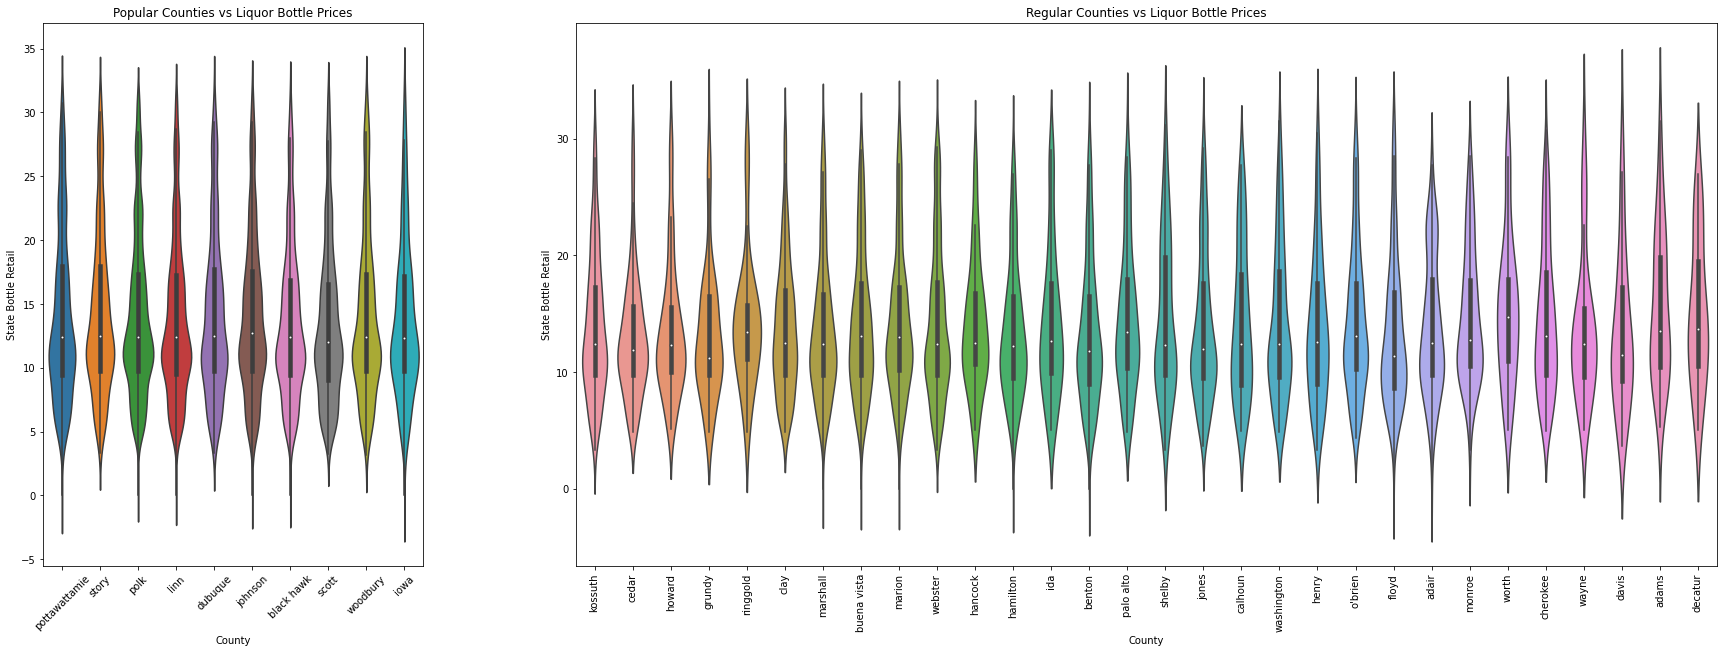

In [23]:
# %%%%%%%%%%%%%%%%%%%%% COUNTIES VS LIQUOR BOTTLE PRICES %%%%%%%%%%%%%%%%%%%%%
plot('State Bottle Retail', 'Liquor Bottle Prices')

In this first row of graphs, we can observe that across all the hotspot counties, on average, bottles of liquor will retail for around \$12, with most liquor bottle prices ranging from \$5 - \$20.

Across our “regular counties”, there was slightly more variation in liquor prices, but the average bottle of liquor also seemed to also cost around \$10 - \$20, not much more different than liquor in our hotspot counties.

What this tells us is that liquor prices do not seem to be significantly marked up or down in hotspot counties compared to regular counties, and vice versa.


##### **Counties vs Amount Spent Per Transaction**

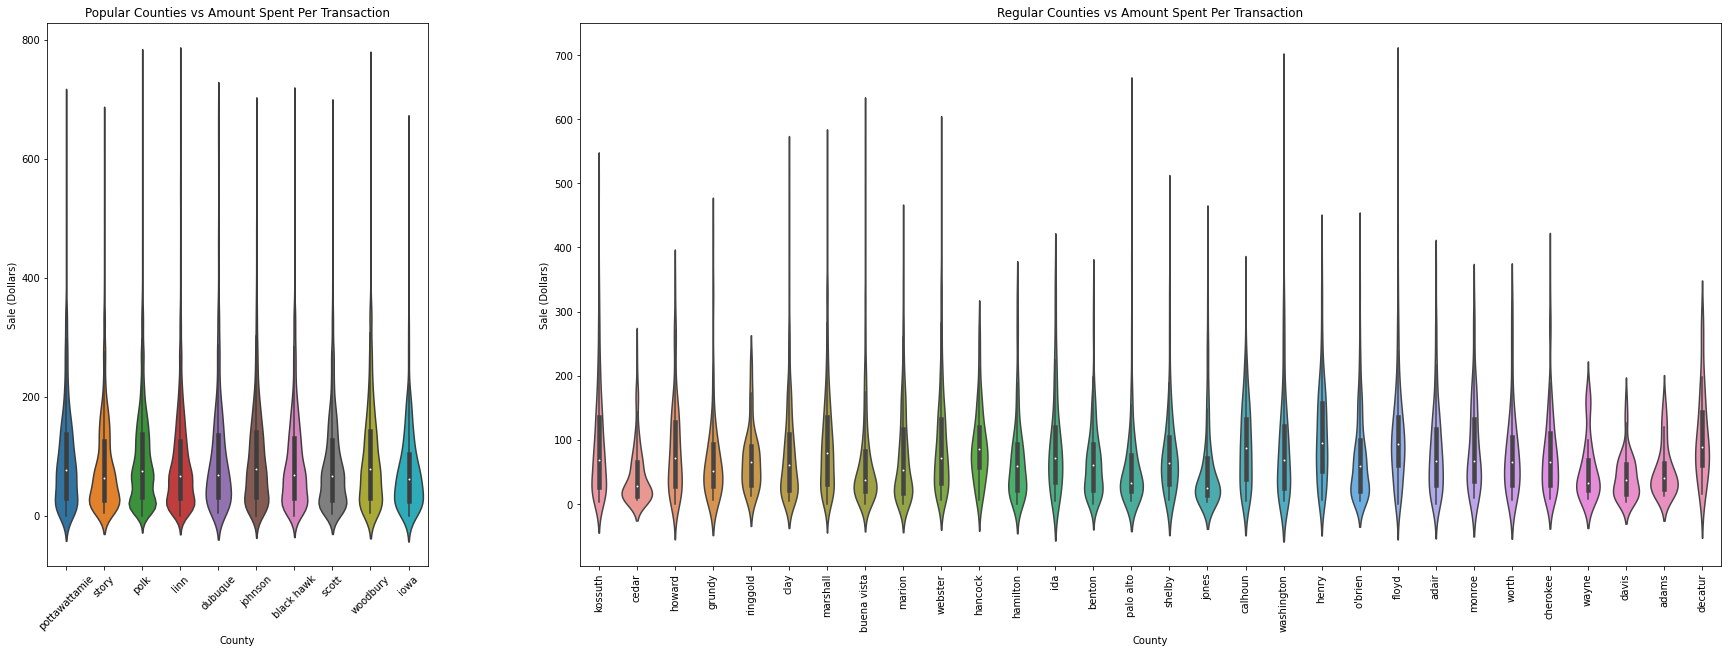

In [24]:
# %%%%%%%%%%%%%%%% COUNTIES VS AMOUNT SPENT PER TRANSACTION %%%%%%%%%%%%%%%%
plot('Sale (Dollars)', 'Amount Spent Per Transaction')

When comparing hotspot and regular counties against `Sale (Dollars)`, we can see again that on average, across all counties, most people spend around \$50 - \$100 each time they visit the liquor store. 

Another thing that we notice is that there is a lot more consistency in the graph for the hotspot counties than for regular counties. Specifically, the peaks of each violin in the hotspot counties’ graph are relatively close to one another, whereas the peaks of each violin in the regular counties’ graph have a lot of variation.


##### **Counties vs Number of Bottles Sold Per Transaction**


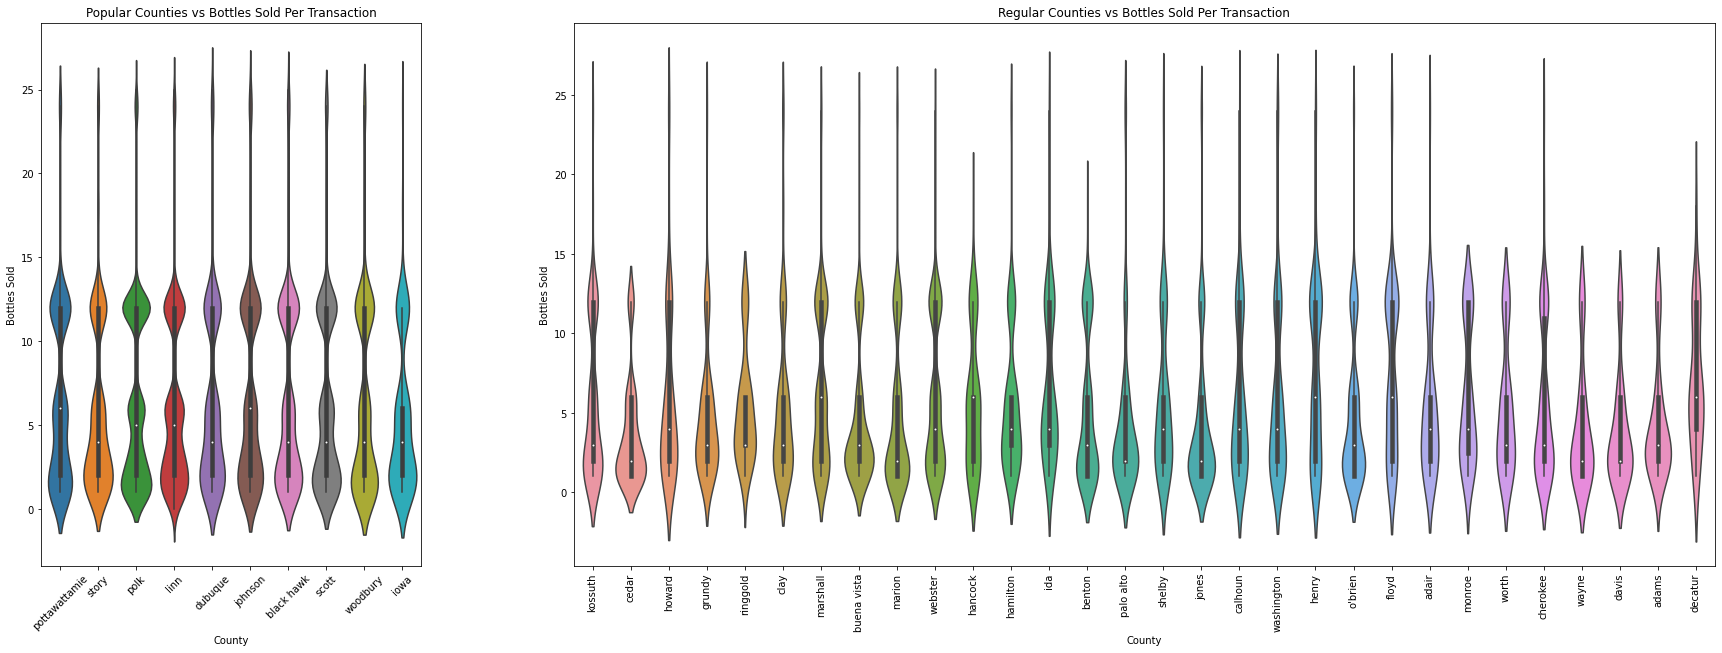

In [25]:
# %%%%%%%%%%%%%%%% COUNTIES VS BOTTLES SOLD PER TRANSACTION %%%%%%%%%%%%%%%%
plot('Bottles Sold', 'Bottles Sold Per Transaction')

Again, for this data, it is difficult to tell if liquor stores in hotspot counties see an increase or decrease in bottles sold per transaction compared to liquor stores in other counties.

The violins for each of these graphs have multiple areas of distribution probably because vendors typically sell liquor in packs of 1, 6, or 12.


<a id=2.3></a>
### **2.3 Plotting Liquor Sales Against Time**

Up until now, we have been focusing on how different counties in Iowa affect Liquor sales. One thing that we did not yet take into consideration is time, specifically, time of the year. Could it be possible that people tend to spend more on liquor or visit liquor stores more often during certain times of the year?

To find these out, we plan on making an overlay graph, plotting the amount spent per transaction and total number of liquor sales against the month of the transaction.

To do this, we need two things: 

1. A `month` column in `data_nofliers` so that we can categorize sales by month
2. Another dataframe with the columns `month` and `total number of sales`, which we will derive from `data`


In [26]:
data_nofliers['month'] = pd.DatetimeIndex(data_nofliers['Date']).month
print('month column addded to end of data_nofliers')
data_nofliers

month column addded to end of data_nofliers


,Date,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),month
0,2016-11-14,council bluffs,51503,1745 madison ave\ncouncil bluffs 51503\n(41.24...,78.0,pottawattamie,1011200.0,straight bourbon whiskies,421.0,sazerac company inc,16518,ancient age bourbon,6.0,1750,17.700001,1.0,106.199997,1.75,11
1,2017-04-05,ames,50010,"2515 chamberlain\names 50010\n(42.021461, -93....",85.0,story,1062300.0,aged dark rum,259.0,heaven hill brands,43991,admiral nelson black patch,12.0,750,10.440000,1.0,125.279999,0.75,4
2,2012-02-20,des moines,50310,3424 martin luther king jr pkw\ndes moines 503...,77.0,polk,1031080.0,vodka 80 proof,55.0,sazerac north america,35316,barton vodka,12.0,750,5.050000,12.0,60.599998,9.00,2
4,2017-01-25,mitchellville,50169.0,"309, center ave\nmitchellville 50169\n(41.6634...",77.0,polk,1012100.0,canadian whiskies,115.0,constellation brands inc,11776,black velvet,12.0,750,7.850000,1.0,94.199997,0.75,1
7,2017-03-27,independence,50644,200 1st st east\nindependence 50644\n(42.46872...,10.0,buchanan,1092000.0,imported distilled spirits specialty,434.0,luxco inc,75087,juarez gold dss,12.0,1000,7.380000,1.0,88.559998,1.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,2017-01-05,west des moines,50266.0,6365 stagecoach dr\nwest des moines 50266\n(41...,77.0,polk,1031000.0,american vodka,205.0,e & j gallo winery,36971,new amsterdam vodka,6.0,1750,21.000000,1.0,119.879997,1.75,1
62951,2013-03-13,sioux city,51106,4267 sergeant rd\nsioux city 51106\n(42.451213...,97.0,woodbury,1012300.0,single malt scotch,370.0,pernod ricard usa/austin nichols,15626,jameson,12.0,750,20.850000,3.0,62.549999,2.25,3
62952,2014-11-20,waterloo,50703,"1309 lafayette st\nwaterloo 50703\n(42.494092,...",7.0,black hawk,1031200.0,vodka flavored,260.0,diageo americas,77740,smirnoff raspberry,12.0,750,12.380000,3.0,37.139999,2.25,11
62953,2016-09-01,des moines,50316.0,1434 des moines st ste 5\ndes moines 50316\n(4...,77.0,polk,1070000.0,cocktails / rtd,395.0,proximo,58888,jose cuervo authentic lime margarita 4pk cans,6.0,800,5.820000,1.0,34.919998,0.80,9


In [27]:
# making the dataframe storing
# month and number of sales per month
from collections import defaultdict

month_dict = defaultdict(lambda: 0)
for date in data['Date']:
  month_dict[date.month-1]+=1
month_dict_df = pd.DataFrame(month_dict.items(), columns=["month", "total number of sales"])

print('The other dataframe with columns: month, total number of sales')
month_dict_df

The other dataframe with columns: month, total number of sales


,month,total number of sales
0,10,4209
1,3,5195
2,1,4740
3,0,4837
4,5,5503
5,2,5090
6,9,5619
7,8,5184
8,4,5569
9,11,5456


<a id=2.3.1></a>
#### **2.3.1 Analyzing our Graph**


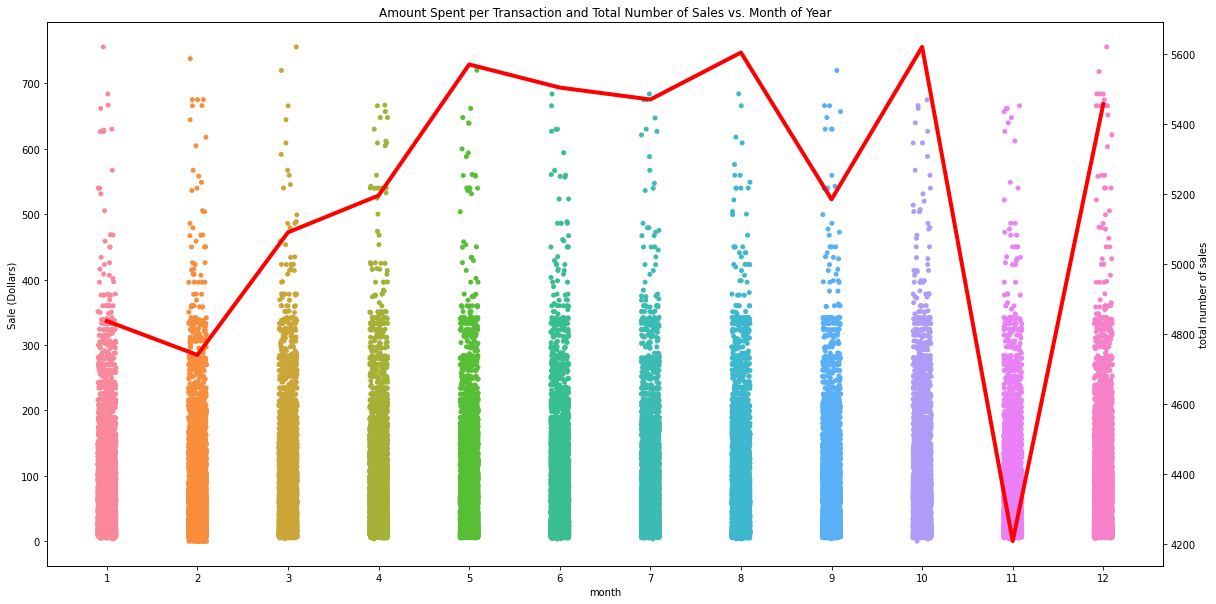

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
  x = 'month',
  y = 'Sale (Dollars)',
  data = data_nofliers,

)
ax2 = ax.twinx()
sns.lineplot(
  x = 'month',
  y = 'total number of sales',
  data = month_dict_df,
  color = 'r',
  linewidth = 4
)
plt.title("Amount Spent per Transaction and Total Number of Sales vs. Month of Year")
plt.show()

From this graph, we can see that across all months, the distribution of money spent buying liquor stays relatively constant. While there are several high rollers every month, most people spend under $350 when going to the liquor store regardless of the month.

However, we can see change in the number of liquor sales per month. The chronological trend in Iowa seems to be that:

1. Not as many people are out buying liquor at the beginning of the year (possibly because of new year's resolutions or because they are recovering from the holidays)
2. Liquor sales consistently grow until they peak in the summer months and start to gradually fall in the Fall 
3. When Winter comes along in November and December, there is a sudden increase in liquor sales (possibly due to approaching holidays like Christmas and New Years).


<a id=3></a>
## **Part 3: Hypothesis Testing**

**Imports**

The only package that we will be using is`statsmodels.stats.weightstats`, which we will use to perform a two-sample hypothesis test.

In [29]:
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id=3.1></a>
### **3.1 Two-Sample Hypothesis Testing**

Based on the graphs that we generated above that plot liquor sales by county, we noticed that for the most part, the amount of money spent buying liquor did not change much across both hotspot counties and regular counties. 

We can use two-sample hypothesis testing to see if this is actually the case, that the true average amount of money spent on liquor per transaction is the same across hotspot counties and regular counties.

Here are our null and alternative hypotheses:
>$
\begin{align*}
   H_0 & : \mu_\mathrm{hotspot\,counties} = \mu_\mathrm{regular\,counties}
   \\
   H_a & : \mu_\mathrm{hotspot\,counties} \neq \mu_\mathrm{regular\,counties}
\end{align*}
$

Firstly, let’s separate `data_nofliers` into two dataframes, one for hotspot counties called `target_counties_data` and the other for regular counties called `regular_counties_data`.


In [30]:
target_counties_data = data_nofliers.loc[data_nofliers['County'].isin(target_counties)]
regular_counties_data = data_nofliers.loc[~data_nofliers['County'].isin(target_counties)]

Here’s the code for our two-sample hypothesis test. We use a z-test since our sample sizes for both hotspot counties and regular counties are over 30.

In [31]:
ztest, pval = stests.ztest(
  x1 = target_counties_data['Sale (Dollars)'], 
  x2 = regular_counties_data['Sale (Dollars)'],
  value = 0,
  alternative = 'two-sided'
)

In [32]:
print("p-value = " + str(pval))

p-value = 1.0291511559016463e-57


<a id=3.2></a>
### **3.2 Hypothesis Testing Conclusions**

Surprisingly, p-value = 2.8020461450061577e-58, which is considerably less than alpha = 0.05, so we definitely reject the null hypothesis.

Based on our sample data, we do have enough evidence to reject the null hypothesis at a significance level of 0.05. 

Although our graphs show that the amounts spent on liquor per transaction are roughly equal across all Iowan counties, hotspot or not, we have enough evidence to conclude that the true average amount spent per transaction in hotspot counties is different from the true average amount spent per transaction in regular counties.

<a id=4></a>
## **Part 4: Machine Learning - Multiple Linear Regression**

**Imports**

For data preprocessing, we will use `sklearn.preprocessing.LabelEncoder`, and for multiple Ordinary Least Squares (OLS) linear regression, we will use `statsmodels.api`. 

In [33]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

---
After conducting hypothesis testing, we now know that the amounts spent on liquor per transaction are not roughly the same across Iowa. We would like to analyze this further and use **multiple linear regression** to see if there are any factors other than brand that influence how much is spent on alcohol. The features that we are considering the most to be potential influences are:

Feature Name | Column Name
--- | ---
City | `City`
Zip Code | `Zip Code`
County Number | `County Number`
County | `County`
Liquor Category Name | `Category Name`
Liquor Category ID | `Category`
Month | `epoch` (to be created)
Date (epoch) | `City`
Store Number | `Store Number`

The target (dependent variable) that we wish to predict is how much people spend on alcohol each time they go and buy it, which is `Sale (Dollars)`. However, since how much is spent on alcohol is dependent on other factors like the volume of alcohol bought and the number of bottles sold, we will be doing separate linear regressions to see if we can identify a linear relationship with those. So to clarify, here are the targets that we will try to run linear regression on:

Target Name | Column Name
--- | ---
Amount Spent on Liquor per Transaction | `Sale (Dollars)`
Volume of Alcohol Bought | `Volume Sold (Liters)`
Number of Bottles Bought | `Bottles Sold`

<a id=4.1></a>
### **4.1 Data Preprocessing**

Because all of our features except Date are categorical data, before we can use them in linear regression, we need to encode them in a way that they can be interpreted quantitatively. Firstly, we will convert our `Date` column into an **epoch**, or Unix Timestamp. This is the number of seconds that have elapsed since January 1, 1970. Secondly, for the rest of our data, we will use the `LabelEncoder` from `sklearn.preprocessing` for categorical encoding. This turns each value in a column into a number.

In [34]:
ml_df = data[data.index.isin(data_nofliers.index)].copy()

# creating the month index
ml_df['month'] = pd.DatetimeIndex(ml_df['Date']).month

In [35]:
ml_df['epoch'] = ml_df.Date.values.astype(np.int64) // 10 ** 9

In [36]:
ml_df2 = ml_df.copy()

label_encoder = LabelEncoder()

cat_features = [
  'City', 
  'Zip Code', 
  'County Number', 
  'County',
  'Category Name',
  'Category',
  'month',
]

for feature in cat_features:
  ml_df2[feature + " encoded"] = label_encoder.fit_transform(ml_df2[feature])

<a id=4.2></a>
### **4.2 Multiple Linear Regression Function**

To conduct multiple linear regression, we have to define X and y, our independent variables and dependent variable respectively. For us, since this is multiple linear regression, our X will be the dataframe slice containing our feature columns, and our y will be either `Sale (Dollars)`, `Volume Sold (Liters)`, or `Bottles Sold`.


In [37]:
features = ml_df2.loc[:, [
  'City encoded', 
  'Zip Code encoded', 
  'County Number encoded', 
  'County encoded',
  'Category Name encoded',
  'Category encoded',
  'month encoded',
  'epoch',
]]

# linear regression function
def linear_regression(target):
  global features
  global ml_df2
  X = features
  y = ml_df2[target]

  ols_model = sm.OLS(y, X).fit()
  print(ols_model.summary())


In [47]:
# function to plot scatter plots after linear regression
def regplot(x1, x2, y):
  global ml_df2
  fig = plt.figure(figsize=(30,10))
  gs = gridspec.GridSpec(1, 2, width_ratios= [1, 1])

  ax1 = plt.subplot(gs[0])
  graph = sns.regplot(
    x = x1, 
    y = y, 
    data = ml_df2,
    ax = ax1,
    line_kws={"color": "red"}
  )
  graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
  graph.set_title(x1 + ' vs ' + y)

  ax2 = plt.subplot(gs[1])
  graph2 = sns.regplot(
    x = x2, 
    y = y, 
    data = ml_df2,
    ax = ax2,
    color = 'g',
    line_kws={"color": "red"}
  )
  graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
  graph2.set_title(x2 + ' vs ' + y)

  plt.show()

<a id=4.3></a>
### **4.3 Multiple Linear Regression Results**

#### **Dependent Variable: `Sale (Dollars)`**

In [39]:
linear_regression('Sale (Dollars)')

                                 OLS Regression Results                                
Dep. Variable:         Sale (Dollars)   R-squared (uncentered):                   0.542
Model:                            OLS   Adj. R-squared (uncentered):              0.542
Method:                 Least Squares   F-statistic:                              8657.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:05:09   Log-Likelihood:                     -2.9967e+05
No. Observations:               51299   AIC:                                  5.994e+05
Df Residuals:                   51292   BIC:                                  5.994e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

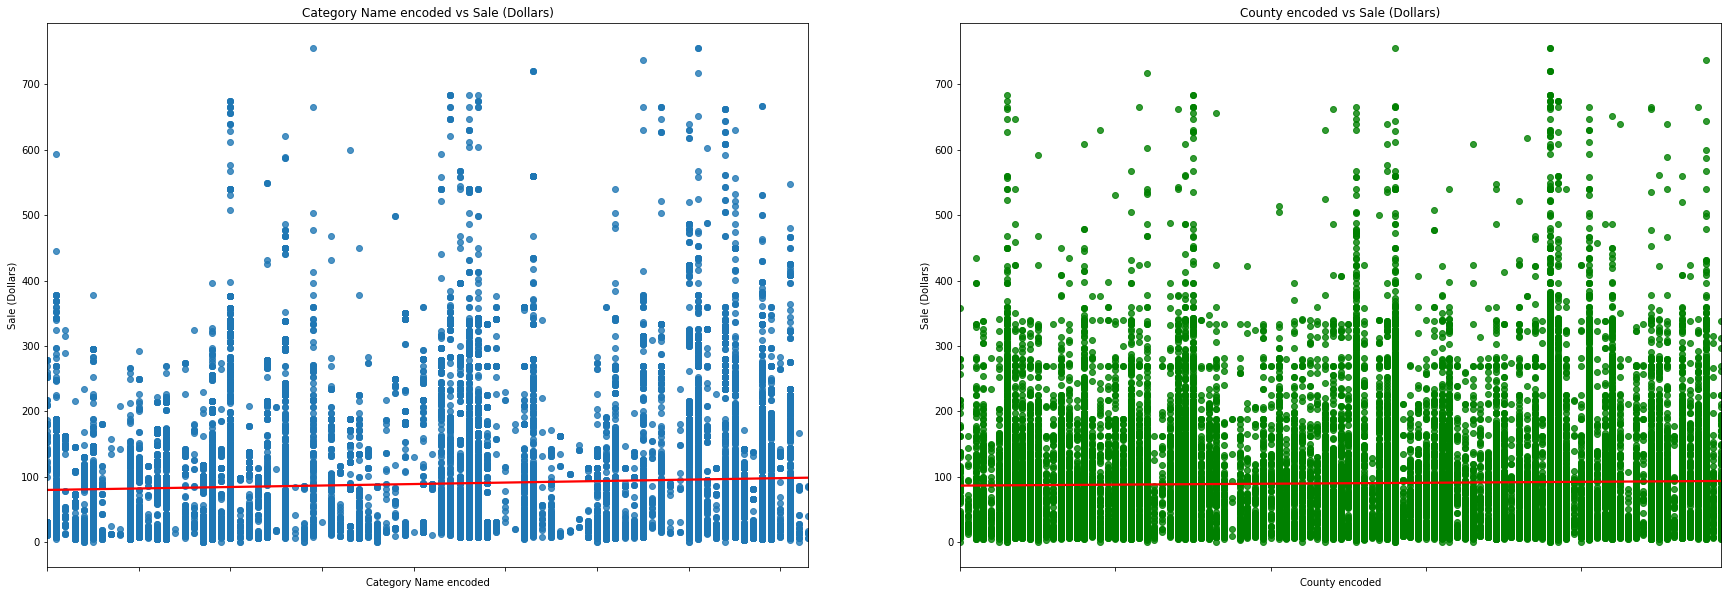

In [48]:
regplot('Category Name encoded', 'County encoded', 'Sale (Dollars)')

From the readout above, we can see that the R-Squared value is 0.542. This means that we can explain 54.2% of the variability of the response data around the mean of `Sale (Dollars)`. 

Although our R-squared value is quite low, we can see from the `P > |t|` column that the only columns with p-values greater than our significance level of 0.05 are Zip Code and month, which means that we identified a linear correlation between all other features and `Sale (Dollars)`. However, despite this, most of our coefficients are close to 0, so it is hard to tell whether any of the features we selected really affected `Sale (Dollars)`.

Even so, out of all our features, the variables that seem to have the greatest impact on how much people spend on liquor are:

1. Category Name - coefficient of 0.2426
2. County - coefficient of 0.0387

#### **Dependent Variable: `Volume Sold (Liters)`**

In [41]:
linear_regression('Volume Sold (Liters)')

                                  OLS Regression Results                                 
Dep. Variable:     Volume Sold (Liters)   R-squared (uncentered):                   0.509
Model:                              OLS   Adj. R-squared (uncentered):              0.509
Method:                   Least Squares   F-statistic:                              7610.
Date:                  Mon, 21 Dec 2020   Prob (F-statistic):                        0.00
Time:                          02:05:18   Log-Likelihood:                     -1.6275e+05
No. Observations:                 51299   AIC:                                  3.255e+05
Df Residuals:                     51292   BIC:                                  3.256e+05
Df Model:                             7                                                  
Covariance Type:              nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
----------

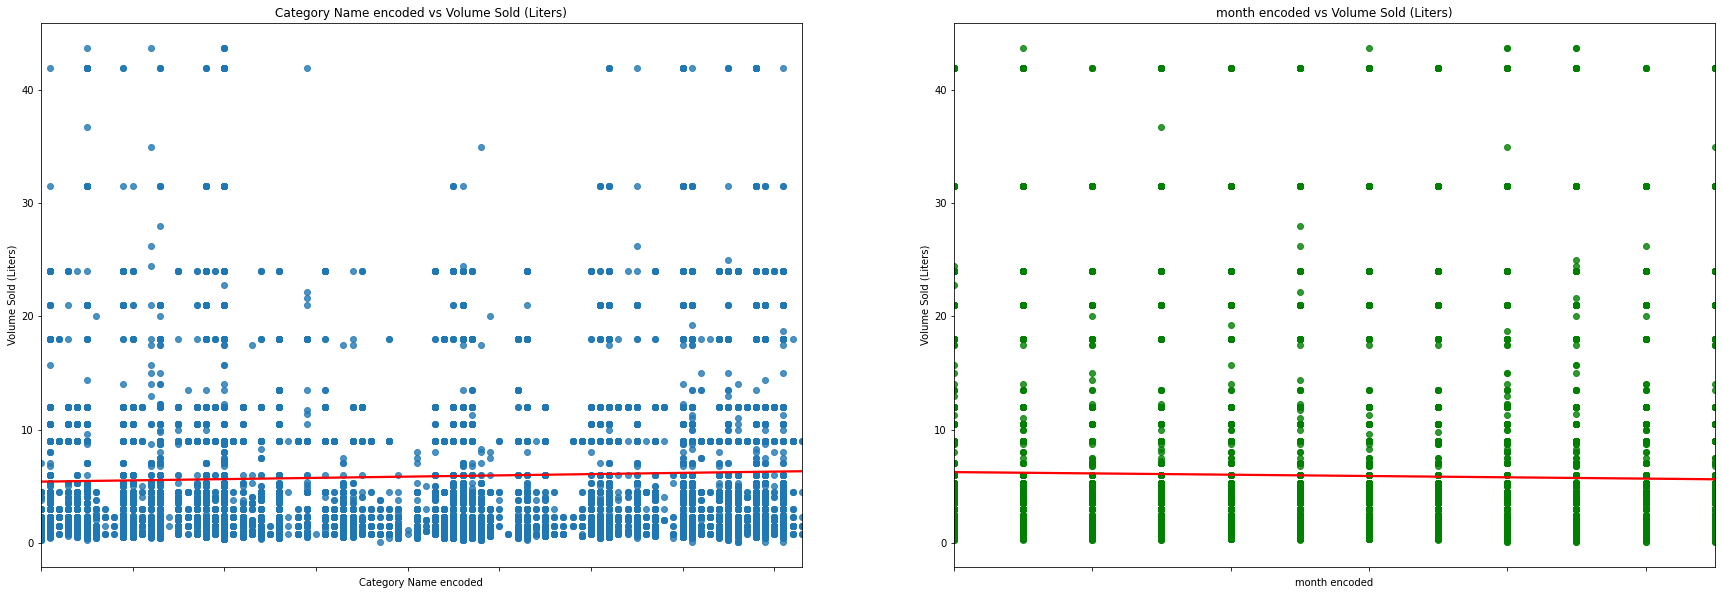

In [51]:
regplot('Category Name encoded', 'month encoded', 'Volume Sold (Liters)')

When our dependent variable is `Volume Sold (Liters)`, we performed a little worse than when our dependent variable was `Sale (Dollars)` with an R-squared value of 0.509.

The only feature with a p-value here greater than the significance level of 0.05 was `City`. All others were 0, meaning there is enough evidence to conclude that there exisist a linear relationship between them and `Volume Sold`. However, identical to our last linear regression model, all of our coefficients were quite close to zero. Once again, it is difficult to discern any legitimate correlations.

The variables that affected `Volume Sold (Liters)` the most were:

1. Category Name- coefficient of 0.0154.
2. Month - coefficient of -0.0301

#### **Dependent Variable: `Bottles Sold`**

In [43]:
linear_regression('Bottles Sold')

                                 OLS Regression Results                                
Dep. Variable:           Bottles Sold   R-squared (uncentered):                   0.561
Model:                            OLS   Adj. R-squared (uncentered):              0.561
Method:                 Least Squares   F-statistic:                              9358.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:05:27   Log-Likelihood:                     -1.5766e+05
No. Observations:               51299   AIC:                                  3.153e+05
Df Residuals:                   51292   BIC:                                  3.154e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [44]:
target = ml_df2['Bottles Sold']

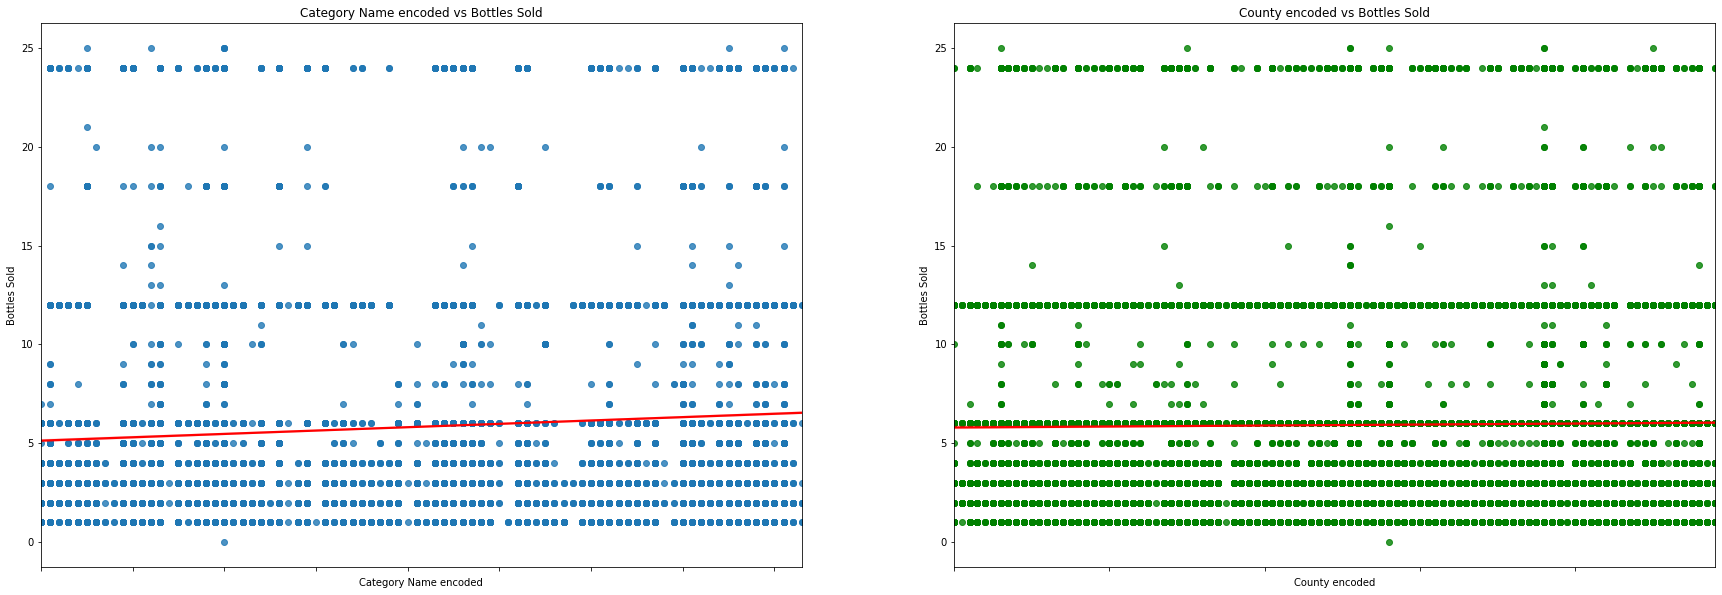

In [50]:
regplot('Category Name encoded', 'County encoded', 'Bottles Sold')

We see that history repeats itself with `Bottles Sold` as our dependent variable. Surprisingly, this model performs the best with an R-squared value of 0.561. All of the p-values associated with our feature coefficients were under the significance level of 0.05 with the exception of City and Category ID. 

Also identical to the last two linear regression models is that our feature coefficients are all very close to 0.

The variables that affected `Bottles Sold` the most were:

1. Category Name - coefficient of 0.0211
2. County - coefficient of 0.0034


<a id=4.4></a>
### **4.4 Multiple Linear Regression Conclusion**

After performing multiple linear regression, we noticed that the coefficients that most influenced the amount people spend on liquor, the volume of liquor that people bought, and the number of bottles bought were **the category of liquor being bought**, **the county that a store is in**, and **the month of the sale**. 

However, even though this was our conclusion, we have to address that the coefficients for these variables were all close to 0 and that all of our R-squared values were at best a little higher than 0.5. From this, we can say that our linear regression models for all 3 dependent variables did not fit very well, and liquor category, county, and month only affected liquor sales slightly.

Even so, the fact that we have more positive coefficients for these 3 properites means that these are the more important factors to consider for current and future store owners when selling liquor.

<a id=5></a>
## **Part 5: Conclusion**

In this project, we analyzed liquor sales in midwestern Iowa and went through each of the three critical steps in the data science pipeline: data curation, parsing, and management; exploratory data analysis; and finally, hypothesis testing and machine learning.

**Exploratory Data Analysis**<br>
During exploratory data analysis, we generated a heatmap that showed us which locations in Iowa are hotspots for liquor sales. Through this, we then drew up several charts comparing liquor sales in hotspot counties and regular counties in Iowa. Finally, we created an overlay plot seeing how the time of the year affected liquor sales.

**Hypothesis Testing and Machine Learning**<br>
In hypothesis testing and machine learning, we learned that on average, location does have an effect on how much Iowans spent buying liquor. Using multiple linear regression, we tried to analyze these sales further to determine what factors most influence how much Iowans spend on liquor. Our Ordinary Least Squares linear regression models told us that these factors were the type of liquor sold at a store as well as the county a store was located in. However, in the end, it was hard to say if these two properties had a legitimate impact on liquor sales since all of our coefficient values were near 0. 

Even though we were unsuccessful in determining what affects liquor sales in Iowa with our particular CSV, it does not mean that there are no factors at all that influence sales. We simply need to continue digging.

**Closing**<br>
Overall, through its ability to extract meaning and patterns out of seemingly random data, data science with Python is an extremely powerful tool that can change the way the world works in the digital era. While today, we analyzed data about liquor sales in Iowa, the three main steps in the data science pipeline can be adapted to any type of data.

[back to top](#top)